In [1]:
import matplotlib.pyplot as plt
import numpy as np

from rp2 import hagai_2018
from rp2.environment import check_environment

check_environment()

## UMI count to transcript number

From Grün *et al.* (2014):

**Conversion of UMI count to transcript number.**

For each gene $i$, $k_{o,i}$ denotes the number of observed UMIs and $k_{n,i}$ the number of non-observed UMIs. The total number $K$ of UMIs is given by

$K=k_{o,i}+k_{n,i}$

the number of sequenced transcripts $m_i$

$m_i=\frac{\ln{\left(1-\frac{k_{o,i}}{K}\right)}}{\ln{\left(1-\frac{1}{K}\right)}}\cong-K\ln{\left(1-\frac{k_{o,i}}{K}\right)}$

Define a function implementing this formula:

In [4]:
def umi_to_transcript_count(ko, K, approx=False):
    ko = np.asarray(ko, dtype=np.float64)
    num = np.log(1 - (ko / K))
    if approx:
        return -K * num
    den = np.log(1 - (1 / K))
    return num / den

Plot the mapping from UMI count to transcript number:

10 bases in 10X experiments permits up to 1,048,576 UMIs


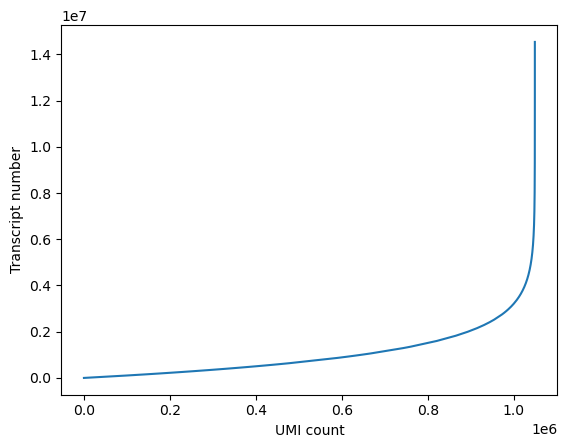

In [6]:
tenx_umi_bases = 10
tenx_umi_max = 4**tenx_umi_bases
print(f"{tenx_umi_bases} bases in 10X experiments permits up to {tenx_umi_max:,} UMIs")

umi_counts = np.arange(tenx_umi_max)
transcript_numbers = umi_to_transcript_count(umi_counts, tenx_umi_max).astype(int)

plt.plot(umi_counts, transcript_numbers)
plt.xlabel("UMI count")
plt.ylabel("Transcript number")
plt.show()

The UMI-transcript transform is an identity mapping for UMI counts up to 1,447


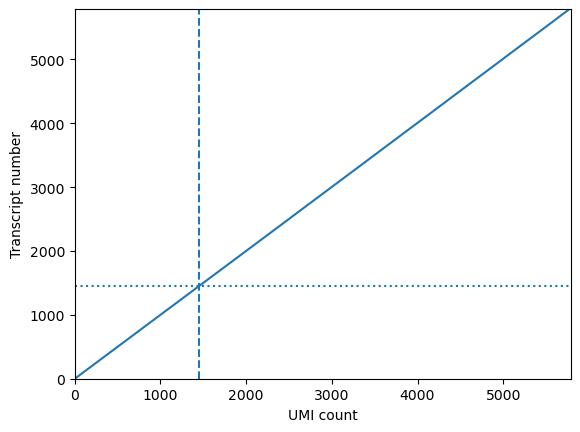

In [7]:
identical_until = np.argwhere(umi_counts == transcript_numbers).max()
print(f"The UMI-transcript transform is an identity mapping for UMI counts up to {identical_until:,}")

plt.plot(umi_counts, transcript_numbers)
plt.xlabel("UMI count")
plt.ylabel("Transcript number")
plt.axvline(x=identical_until, ls="--")
plt.axhline(y=identical_until, ls=":")
plt.xlim(0, identical_until * 4)
plt.ylim(0, identical_until * 4)
plt.show()

In [9]:
umi_count_ad = hagai_2018.load_umi_counts_with_additional_annotation("mouse")
umi_count_ad.var["max"] = umi_count_ad.X.max(axis=0).A.squeeze().astype(int)

high_count_var = umi_count_ad.var.loc[umi_count_ad.var["max"] >= identical_until].sort_values(by="max", ascending=False)
print(f"{len(high_count_var):,} genes out of {umi_count_ad.n_vars:,} have UMI count >= {identical_until:,}")

for i, row in enumerate(high_count_var.itertuples(), start=1):
    print(f"  {i}. {row.symbol}: max UMI of {row.max:,} maps to {transcript_numbers[row.max]:,} transcripts")

9 genes out of 22,048 have UMI count >= 1,447
  1. Fth1: max UMI of 4,862 maps to 4,873 transcripts
  2. S100a8: max UMI of 2,698 maps to 2,701 transcripts
  3. Ftl1: max UMI of 2,652 maps to 2,655 transcripts
  4. Saa3: max UMI of 2,162 maps to 2,164 transcripts
  5. S100a9: max UMI of 2,036 maps to 2,037 transcripts
  6. Ccl4: max UMI of 1,597 maps to 1,598 transcripts
  7. Cxcl2: max UMI of 1,580 maps to 1,581 transcripts
  8. Actb: max UMI of 1,555 maps to 1,556 transcripts
  9. Jchain: max UMI of 1,541 maps to 1,542 transcripts
